0.9997357911447292
2.9990026018599067
4.998463055846986
6.9975810215451855
8.996254117248267


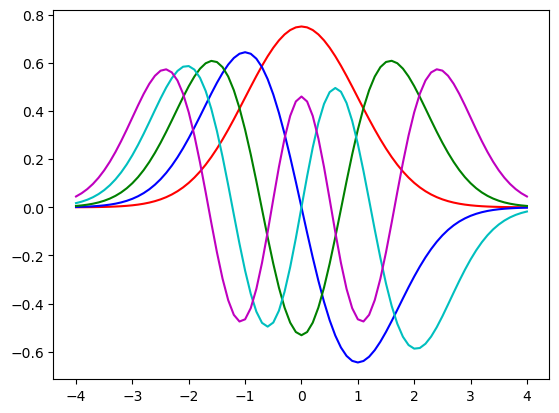

In [1]:
import numpy as np
from scipy.integrate import RK45
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def shoot2(y, x, beta):
    return [y[1], (x**2-beta) * y[0]]

tol = 1e-4 
col = ['r', 'b', 'g', 'c', 'm', 'k']  
dummy=np.linspace(-4, 4, 81)
xspan=np.linspace(-4, 4, 81)

eigenvectors=[]
eigenvalues=[]

beta_start = 1e-6  

for modes in range(1, 6):  
    beta = beta_start  
    dbeta = 0.01 
    for _ in range(1000):  
        y0 = [1, np.sqrt(16-beta)]
        y = solve_ivp(lambda x, y: shoot2 (y,x,beta), [-4, 4], y0, t_eval=xspan) 
        if abs(y.y.T[-1, 1]+(np.sqrt(16-beta)*y.y.T[-1,0])) < tol:  
            print(beta)  
            eigenvalues.append(beta)
            break  

        if (-1) ** (modes + 1) * (y.y.T[-1, 1]+(np.sqrt(16-beta)*y.y.T[-1,0])) > 0:
            beta += dbeta
        else:
            beta -= dbeta / 2
            dbeta /= 2

    beta_start = beta + 0.01 
    norm = np.trapz(y.y.T[:, 0] * y.y.T[:, 0], xspan) 
    eigenvectors.append(np.abs(y.y.T[:, 0] / np.sqrt(norm)))
    plt.plot(xspan, y.y.T[:, 0] / np.sqrt(norm), col[modes - 1])  
    
plt.show() 

A1=np.array(eigenvectors).T
A2=np.array(eigenvalues)



In [2]:
from scipy.linalg import eig


x=np.arange(-4+0.1,4,0.1)
N=np.size(x)
dx=0.1

B = np.zeros((N, N))
for j in range(N):
    B[j, j] = -2 -((dx**2)*(x[j]**2))
for j in range(N - 1):
    B[j, j + 1] = 1
    B[j + 1, j] = 1
B[0,0]+=(4/3)
B[-1,-1]+=(4/3)
B[0,1]-=(1/3)
B[-1,-2] -= 1/3
B = -( B / (dx**2))

D,V = eig(B)


sorted_indices = np.argsort(np.abs(D))
Dsort = D[sorted_indices]
Vsort =V[:, sorted_indices]

x=np.arange(-4,4.1,0.1)
A3=np.zeros((N+2, 5))

for i in range(5):
    A3[1:-1,i] = (Vsort[:, 0:5])[:,i]
    A3[0,i] = ((4/3*A3[1,i])-(1/3)*A3[2,i])
    A3[-1,i] = ((4/3*A3[-2,i])-(1/3)*A3[-3,i])
    norm= np.trapz(A3[:,i]*A3[:,i],x)
    A3[:, i] = A3[:, i] / np.sqrt(norm)

A3 = np.abs(A3)    
A4 = Dsort[0:5].real

print(A3.shape)
print(A4.shape)

(81, 5)
(5,)


1.0129448682215312
2.9214054852869578


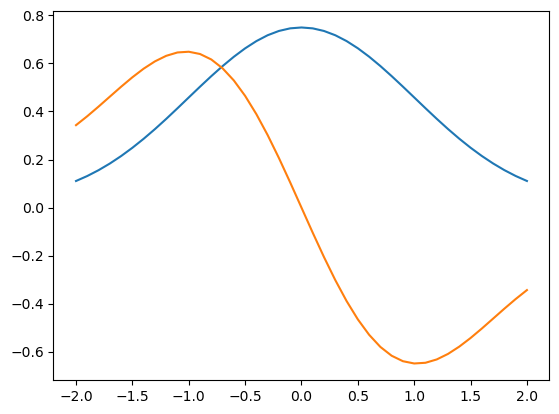

(41, 2)
(2,)


In [3]:
import numpy as np
from scipy.integrate import RK45
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

gamma=0.05

def nonlinearfocus(x, y, beta):
    return [y[1], ((gamma*y[0]**2)+x**2-beta) * y[0]]

tol = 1e-6  
col = ['r', 'b']  
xspan=np.linspace(-2, 2, 41)

eigenvectors=[]
eigenvalues=[]

beta_start = 0.1

Astart = 1e-6

A=Astart
beta = beta_start
for modes in range(1,3):  
    dA = 0.1
    for _ in range(100):
        dbeta = 0.1
        for _ in range(100):  
            y0 = [A, A*np.sqrt(4-beta)]
            y = solve_ivp(lambda x, y: nonlinearfocus(x, y, beta), [-2, 2], y0, t_eval=xspan)
            xd = y.t
            if abs(y.y[1, -1]+(np.sqrt(4-beta)*y.y[0,-1])) < tol:
                break  
            if (-1) ** (modes -1) * (y.y.T[-1, 1]+(np.sqrt(4-beta)*y.y.T[-1,0])) > 0:
                beta += dbeta
            else:
                beta -= dbeta 
                dbeta /= 2

        area = np.trapz(np.abs(y.y.T[:,0])**2, xspan)  
        if np.abs(area - 1) <tol:
            print(beta) 
            eigenvalues.append(beta)
            break
        if (area)<1:
            A+=dA
        else:
            A -= dA / 2
            dA /=2
            
    beta +=dbeta
    norm = np.trapz(y.y.T[:, 0] * y.y.T[:, 0], xspan)
    eigenvectors.append(np.abs(y.y.T[:, 0] / np.sqrt(norm)))
    plt.plot(xspan, y.y.T[:, 0] / np.sqrt(norm)), col[modes - 1] 

plt.show() 

A5=np.array(eigenvectors).T
A6=np.array(eigenvalues)
print(A5.shape)
print(A6.shape)

In [4]:
print(A6)

[1.01294487 2.92140549]


0.9740366445312502
2.8931284414062532


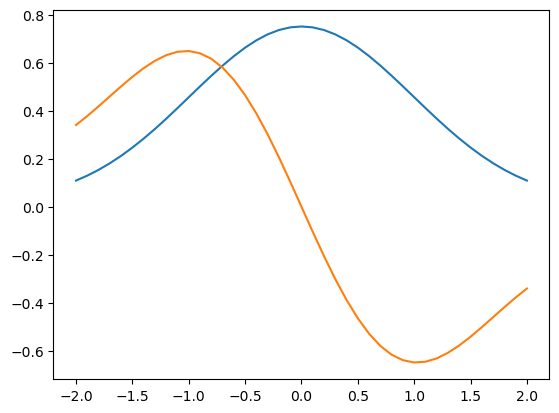

(41, 2)
(2,)


In [5]:
gamma=-0.05

def nonlineardefocus(x, y, beta):
    return [y[1], ((gamma*y[0]**2)+x**2-beta) * y[0]]

tol = 1e-4  
col = ['r', 'b']  
xspan=np.linspace(-2, 2, 41)

eigenvectors=[]
eigenvalues=[]

beta_start = 1e-6 
Astart = 1e-6

A=Astart
beta = beta_start
for modes in range(1, 3):  
    dA = 0.1
    for _ in range(100):
        dbeta = 0.1
        for _ in range(100):  
            y0 = [A, A*np.sqrt(4-beta)]
            y = solve_ivp(lambda x, y: nonlineardefocus(x, y, beta), [-2, 2], y0, t_eval=xspan)
            if abs(y.y[1, -1]+(np.sqrt(4-beta)*y.y[0,-1])) < tol:
                break  
            if (-1) ** (modes + 1) * (y.y.T[-1, 1]+(np.sqrt(4-beta)*y.y.T[-1,0])) > 0:
                beta += dbeta
            else:
                beta -= dbeta / 2
                dbeta /= 2

        area = np.trapz(np.abs(y.y.T[:,0])**2, xspan)  
        if np.abs(area - 1) <tol:
            print(beta) 
            eigenvalues.append(beta)
            break
        if np.abs(area)<1:
            A+=dA
        else:
            A -= dA / 2
            dA /=2
            
    beta +=dbeta
    norm = np.trapz(y.y.T[:, 0] * y.y.T[:, 0], xspan)
    eigenvectors.append(np.abs(y.y.T[:, 0] / np.sqrt(norm)))
    plt.plot(xspan, y.y.T[:, 0] / np.sqrt(norm)), col[modes - 1] 

plt.show() 

A7=np.array(eigenvectors).T
A8=np.array(eigenvalues)
print(A7.shape)
print(A8.shape)

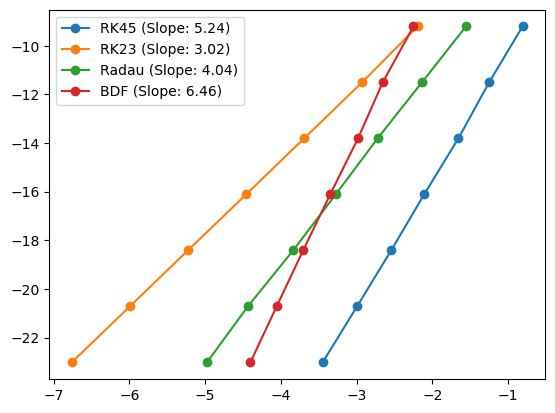

(4,)


In [6]:
from scipy.integrate import solve_ivp

x = [-2, 2]  
tolerances = [1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10]  

y0 = [1, np.sqrt(3)]

def function(x, y):
    return [y[1], (-1 +x**2) * y[0]]

def convergence_study(method):
    avg_step_sizes = []
    for tol in tolerances:
        options = {'rtol': tol, 'atol': tol}
        sol = solve_ivp(function, x, y0, method=method, args=(), **options)
        step_sizes = np.diff(sol.t)
        avg_step_sizes.append(np.mean(step_sizes))

    return avg_step_sizes

RK45 = convergence_study('RK45')
RK23 = convergence_study('RK23')
Radau = convergence_study('Radau')
BDF = convergence_study('BDF')

methods = ['RK45', 'RK23', 'Radau', 'BDF']
steps = [RK45, RK23, Radau, BDF]
slopes = []

for i, (method, steps) in enumerate(zip(methods, steps)):
    log_tol = np.log(tolerances)
    log_step = np.log(steps)
    
    slope, _ = np.polyfit(log_step, log_tol, 1)
    slopes.append(slope)

    plt.plot(log_step, log_tol, 'o-', label=f"{method} (Slope: {slope:.2f})")
    
plt.legend()
plt.show()

A9 = np.array(slopes)
print(A9.shape)


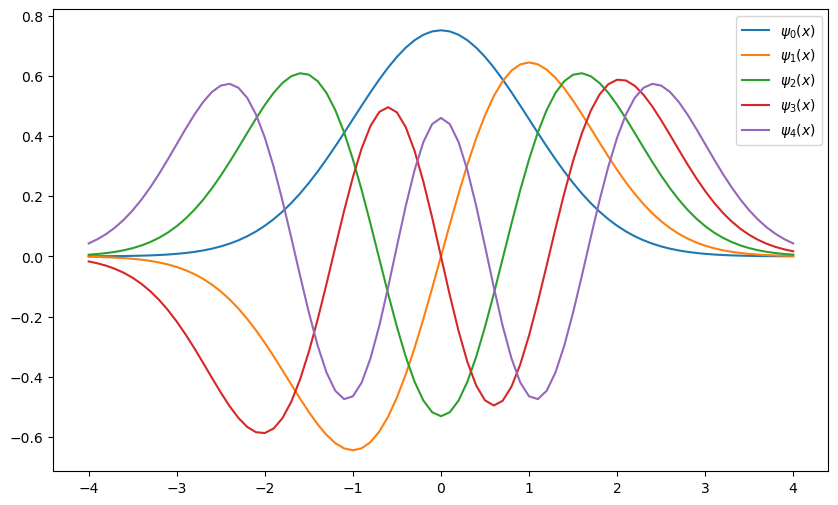

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import hermite

def factorial(n):
    result = 1
    for i in range(1, n + 1):
        result *= i
    return result


m = 1.0     
hbar = 1.0  
omega = 1.0 

true_functions=[]
true_energy=[]
def harmonic_oscillator_wavefunction(n, x):
    coeff = (m * omega / (np.pi * hbar)) ** 0.25 / np.sqrt(2**n * factorial(n))
    H_n = hermite(n)
    return coeff * H_n(np.sqrt(m * omega / hbar) * x) * np.exp(-m * omega * x**2 / (2 * hbar))

x = np.linspace(-4, 4, 81)
plt.figure(figsize=(10, 6))
for n in range(5):
    psi_n = harmonic_oscillator_wavefunction(n, x)
    true_functions.append(psi_n)
    plt.plot(x, psi_n, label=f'$\\psi_{n}(x)$')

plt.legend()
plt.show()

energy_levels = [(2*n + 1) * hbar * omega for n in range(5)]
true_energy.append(energy_levels)
    
true_functions=np.array(true_functions)

def errors(homework_eigenfunctions, homework_eigenvalues, exact_functions, exact_eigenvalues):
    eigenfunction_errors=[]
    for n in range(5): 
        error = homework_eigenfunctions - np.abs(exact_functions)
        error_1 = np.trapz(error[n]**2)
        eigenfunction_errors.append(error_1)
        
    eigenvalue_errors = 100*np.abs((homework_eigenvalues-exact_eigenvalues)/exact_eigenvalues)
    eigenfunction_errors = np.array(eigenfunction_errors)
    eigenvalue_errors = np.squeeze(eigenvalue_errors)
    
    return eigenfunction_errors, eigenvalue_errors

A10, A11 = errors(A1.T, A2, true_functions, true_energy)
A12, A13 = errors(A3.T, A4, true_functions, true_energy)
A12=A12/10